## Import Library

In [ ]:
# Test

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from datetime import date
from functools import reduce
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.stats import boxcox
import seaborn as sns

## Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/superstore.csv', encoding='cp1252')
pd.set_option('display.max_columns', None)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preprocessing

In [ ]:
data = data.drop(["Row ID", "Ship Date", "Ship Mode", "Customer Name", "Country", "State", "Postal Code", "Region", "Sub-Category", "Product Name", "Discount", "Profit"], axis=1)
data.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,FUR-BO-10001798,Furniture,261.9600,2
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,FUR-CH-10000454,Furniture,731.9400,3
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Los Angeles,OFF-LA-10000240,Office Supplies,14.6200,2
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,FUR-TA-10000577,Furniture,957.5775,5
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,OFF-ST-10000760,Office Supplies,22.3680,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     9994 non-null   object 
 1   Order Date   9994 non-null   object 
 2   Customer ID  9994 non-null   object 
 3   Segment      9994 non-null   object 
 4   City         9994 non-null   object 
 5   Product ID   9994 non-null   object 
 6   Category     9994 non-null   object 
 7   Sales        9994 non-null   float64
 8   Quantity     9994 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 702.8+ KB


In [ ]:
print("Jumlah duplikasi data : " + str(data.duplicated().sum()))

Jumlah duplikasi data : 1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
negative_sales = data[data["Sales"] < 0]
negative_sales.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity


In [ ]:
negative_quantity = data[data["Quantity"] < 0]
negative_quantity.head()

,Order ID,Order Date,Customer ID,Segment,City,Product ID,Category,Sales,Quantity


## Feature Engineering

### Total Products Purchased (F)


In [ ]:
data_total_products_purchased = data.groupby(["Customer ID"], as_index=False)['Quantity'].sum()
data_total_products_purchased.rename(columns={"Quantity": "Total Products Purchased"}, inplace=True)
data_total_products_purchased.head(10)

,Customer ID,Total Products Purchased
0,AA-10315,30
1,AA-10375,41
2,AA-10480,36
3,AA-10645,64
4,AB-10015,13
5,AB-10060,56
6,AB-10105,73
7,AB-10150,37
8,AB-10165,48
9,AB-10255,39


### Unique Total Category Purchased - Products Diversity

In [ ]:
unique_total_category = data.groupby(["Customer ID"], as_index=False)['Category'].nunique()
unique_total_category.rename(columns={"Category": "Unique Total Category Purchased"}, inplace=True)
unique_total_category.head(10)

,Customer ID,Unique Total Category Purchased
0,AA-10315,3
1,AA-10375,3
2,AA-10480,3
3,AA-10645,3
4,AB-10015,3
5,AB-10060,3
6,AB-10105,3
7,AB-10150,3
8,AB-10165,3
9,AB-10255,3


### Days Since Last Purchased (R)

In [ ]:
# Convert to datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'])

last_purchased_date = data.groupby(["Customer ID"], as_index=False)['Order Date'].max()

max_date = data['Order Date'].max() + pd.Timedelta(3, "d")
last_purchased_date['Days Since Last Purchased'] = (max_date - last_purchased_date['Order Date']).dt.days
last_purchased_date.sort_values(by='Days Since Last Purchased', ascending=True)
last_purchased_date = last_purchased_date.drop(['Order Date'], axis=1)
last_purchased_date

,Customer ID,Days Since Last Purchased
0,AA-10315,187
1,AA-10375,22
2,AA-10480,262
3,AA-10645,58
4,AB-10015,418
...,...,...
788,XP-21865,46
789,YC-21895,7
790,YS-21880,12
791,ZC-21910,57


### Total frequency transaction (F)

In [ ]:
total_transaction = data.groupby('Customer ID')['Order ID'].nunique()
total_transaction = total_transaction.to_frame().reset_index()
total_transaction.columns = ['Customer ID', 'Total Transaction']
total_transaction

,Customer ID,Total Transaction
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
788,XP-21865,11
789,YC-21895,5
790,YS-21880,8
791,ZC-21910,13


### Average Sales (M)

In [ ]:
total_spend_per_transaction = data.groupby(['Customer ID'], as_index=False)['Sales'].sum()

average_transaction = pd.merge(total_transaction, total_spend_per_transaction, on='Customer ID')
average_transaction['Average Sales'] = average_transaction['Sales'] / average_transaction['Total Transaction']
average_transaction.columns = ['Customer ID', 'Total Transaction', 'Total Sales', 'Average Sales']
average_transaction

,Customer ID,Total Transaction,Total Sales,Average Sales
0,AA-10315,5,5563.560,1112.712000
1,AA-10375,9,1056.390,117.376667
2,AA-10480,4,1790.512,447.628000
3,AA-10645,6,5086.935,847.822500
4,AB-10015,3,886.156,295.385333
...,...,...,...,...
788,XP-21865,11,2374.658,215.878000
789,YC-21895,5,5454.350,1090.870000
790,YS-21880,8,6720.444,840.055500
791,ZC-21910,13,8025.707,617.362077


### Monthly Spending Mean (Pattern)

In [ ]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

monthly_spending_mean = data.groupby(['Customer ID', 'Year', 'Month'], as_index=False)['Sales'].sum()
monthly_spending_mean = monthly_spending_mean.groupby(['Customer ID'], as_index=False)['Sales'].mean()
monthly_spending_mean.rename(columns={"Sales": "Monthly Spending Mean"}, inplace=True)
monthly_spending_mean

,Customer ID,Monthly Spending Mean
0,AA-10315,1112.712000
1,AA-10375,117.376667
2,AA-10480,447.628000
3,AA-10645,847.822500
4,AB-10015,295.385333
...,...,...
788,XP-21865,296.832250
789,YC-21895,1090.870000
790,YS-21880,840.055500
791,ZC-21910,891.745222


### Monthly Spending Standard Deviation (Pattern)

In [ ]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

monthly_spending_std = data.groupby(['Customer ID', 'Year', 'Month'], as_index=False)['Sales'].sum()
monthly_spending_std = monthly_spending_std.groupby(['Customer ID'], as_index=False)['Sales'].std()
monthly_spending_std.rename(columns={"Sales": "Monthly Spending Std"}, inplace=True)
monthly_spending_std['Monthly Spending Std'].fillna(0, inplace=True)
monthly_spending_std

,Customer ID,Monthly Spending Std
0,AA-10315,1863.634544
1,AA-10375,160.542898
2,AA-10480,544.047829
3,AA-10645,759.730610
4,AB-10015,275.932428
...,...,...
788,XP-21865,253.385888
789,YC-21895,1214.932890
790,YS-21880,1257.954059
791,ZC-21910,793.602738


### Average days between purchases

In [ ]:
customer_order = data.groupby(['Customer ID', 'Order ID'], as_index=False)['Order Date'].max()
customer_order.sort_values(by = 'Order Date', inplace=True)
customer_order['Days Between Orders'] = customer_order.groupby(['Customer ID'])['Order Date'].diff().dt.days
avg_days_between_orders = customer_order.groupby(['Customer ID'], as_index=False)['Days Between Orders'].mean()
avg_days_between_orders.columns = ['Customer ID', 'Average days between order']

avg_days_between_orders

,Customer ID,Average days between order
0,AA-10315,296.500000
1,AA-10375,166.250000
2,AA-10480,359.000000
3,AA-10645,246.400000
4,AB-10015,498.000000
...,...,...
788,XP-21865,139.700000
789,YC-21895,283.750000
790,YS-21880,153.428571
791,ZC-21910,93.333333


### Customer segment

In [ ]:
cust_segment = data.groupby(['Customer ID'], as_index=False)['Segment'].agg(pd.Series.mode)
label_encoder = LabelEncoder()
cust_segment['Segment'] = label_encoder.fit_transform(cust_segment['Segment'])
cust_segment

,Customer ID,Segment
0,AA-10315,0
1,AA-10375,0
2,AA-10480,0
3,AA-10645,0
4,AB-10015,0
...,...,...
788,XP-21865,0
789,YC-21895,1
790,YS-21880,1
791,ZC-21910,0


In [ ]:
dataframes = [data_total_products_purchased, last_purchased_date, average_transaction, monthly_spending_mean, monthly_spending_std]

merged_data = reduce(lambda left, right: pd.merge(left, right, on='Customer ID', how='outer'), dataframes)
merged_data

,Customer ID,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std
0,AA-10315,30,187,5,5563.560,1112.712000,1112.712000,1863.634544
1,AA-10375,41,22,9,1056.390,117.376667,117.376667,160.542898
2,AA-10480,36,262,4,1790.512,447.628000,447.628000,544.047829
3,AA-10645,64,58,6,5086.935,847.822500,847.822500,759.730610
4,AB-10015,13,418,3,886.156,295.385333,295.385333,275.932428
...,...,...,...,...,...,...,...,...
788,XP-21865,100,46,11,2374.658,215.878000,296.832250,253.385888
789,YC-21895,31,7,5,5454.350,1090.870000,1090.870000,1214.932890
790,YS-21880,58,12,8,6720.444,840.055500,840.055500,1257.954059
791,ZC-21910,105,57,13,8025.707,617.362077,891.745222,793.602738


## EDA

<ipython-input-22-eeb2c4267888>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data[x] , bins = 20)
<ipython-input-22-eeb2c4267888>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data[x] , bins = 20)
<ipython-input-22-eeb2c4267888>:9: UserWarning: 

`distplot` is a deprecated f

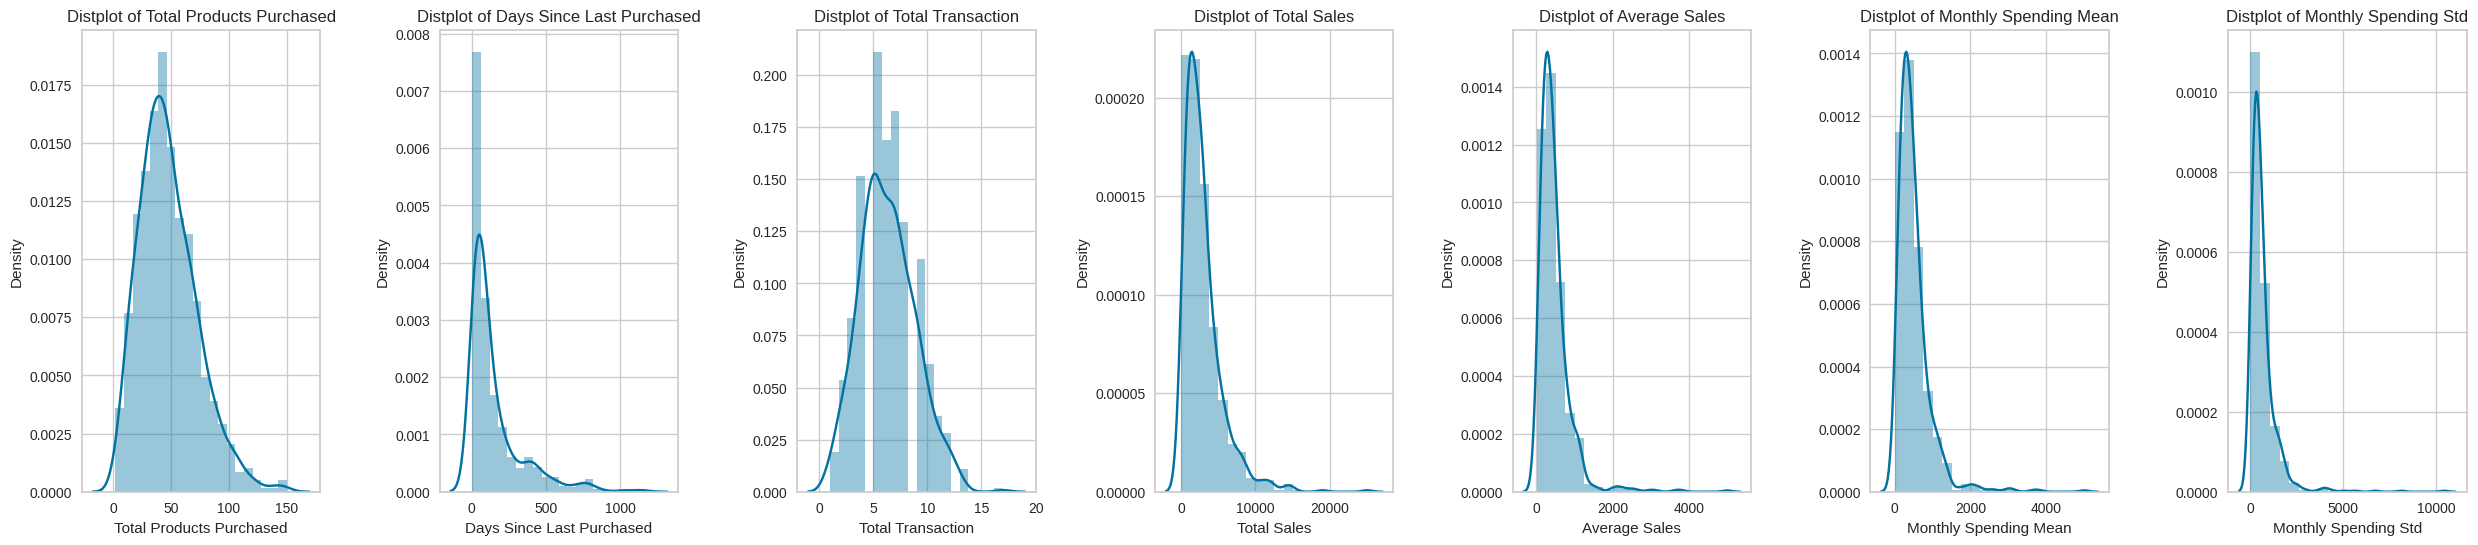

In [ ]:
plt.figure(1 , figsize = (40 , 6))
n = 0
for x in ['Total Products Purchased' , 'Days Since Last Purchased',
       'Total Transaction', 'Total Sales', 'Average Sales',
       'Monthly Spending Mean', 'Monthly Spending Std']:
    n += 1
    plt.subplot(1 , 9 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(merged_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Outlier Handling

In [ ]:
def check_outliers(df, col):
  col_Q3 = df[col].quantile(0.75)
  col_Q1 = df[col].quantile(0.25)
  col_IQR = col_Q3 - col_Q1
  col_RLB = col_Q1 - 1.5 * col_IQR
  col_RUB = col_Q3 + 1.5 * col_IQR
  col_outlier_df = df.loc[(df[col] < col_RLB) | (df[col] > col_RUB)]
  print(f"Number of outliers in attribute {col}: {len(col_outlier_df)}")
  print(f"Proportion of outliers in attribute {col}: {len(col_outlier_df)/df[col].count()*100}\n")

  return int(len(col_outlier_df))

In [ ]:
outlier_col = []
for num_col in merged_data.select_dtypes(np.number).columns:
  outlier = check_outliers(merged_data, num_col)
  if(outlier > 0):
    outlier_col.append(num_col)

Number of outliers in attribute Total Products Purchased: 14
Proportion of outliers in attribute Total Products Purchased: 1.7654476670870116

Number of outliers in attribute Days Since Last Purchased: 74
Proportion of outliers in attribute Days Since Last Purchased: 9.331651954602775

Number of outliers in attribute Total Transaction: 8
Proportion of outliers in attribute Total Transaction: 1.008827238335435

Number of outliers in attribute Total Sales: 43
Proportion of outliers in attribute Total Sales: 5.422446406052964

Number of outliers in attribute Average Sales: 51
Proportion of outliers in attribute Average Sales: 6.431273644388398

Number of outliers in attribute Monthly Spending Mean: 40
Proportion of outliers in attribute Monthly Spending Mean: 5.044136191677175

Number of outliers in attribute Monthly Spending Std: 56
Proportion of outliers in attribute Monthly Spending Std: 7.0617906683480465



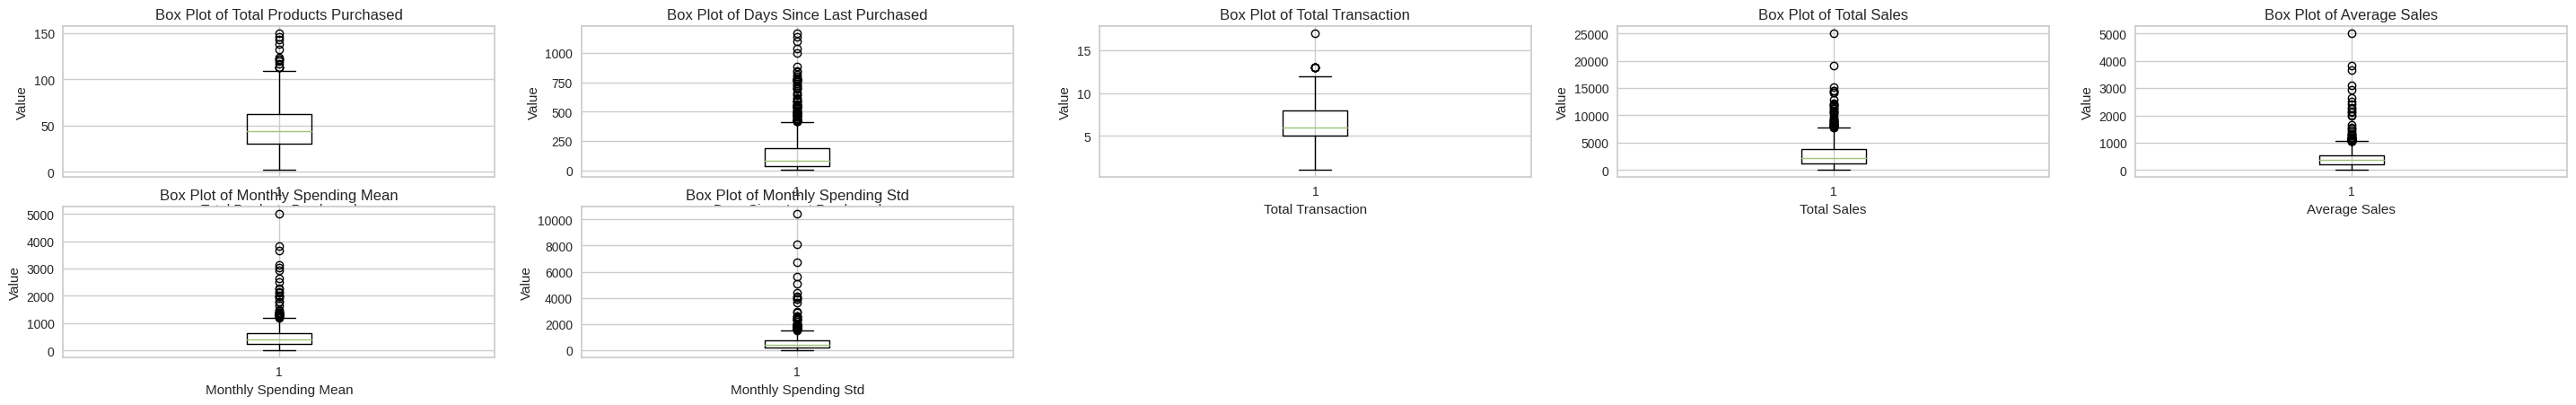

In [ ]:
num_col = merged_data.select_dtypes(include='number')

plt.figure(figsize=(36, 10))
counter = 1

for columnName, columnData in num_col.items():
    plt.subplot(4, 5, counter)
    plt.boxplot(num_col[columnName])
    plt.title('Box Plot of ' + columnName)
    plt.xlabel(columnName)
    plt.ylabel('Value')
    counter+=1

plt.show()

In [ ]:
merged_data_outlier = merged_data.copy()
for col in outlier_col:
  transformed_col, _ = boxcox(merged_data_outlier[col] + 1)
  merged_data_outlier[col] = transformed_col

merged_data_outlier

,Customer ID,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std
0,AA-10315,8.541554,5.622802,3.246475,37.548813,14.532599,15.374392,24.267017
1,AA-10375,10.175541,3.271389,5.029572,22.055699,7.717945,8.002326,10.823704
2,AA-10480,9.465144,6.010992,2.732903,26.205462,11.419980,11.980551,16.418885
3,AA-10645,12.973455,4.309337,3.727444,36.513157,13.546680,14.295050,18.298195
4,AB-10015,5.219509,6.555341,2.177168,20.806984,10.167655,10.627107,13.081030
...,...,...,...,...,...,...,...,...
788,XP-21865,16.442383,4.056387,5.812694,28.696861,9.286318,10.642363,12.703447
789,YC-21895,8.701692,2.138642,3.246475,37.317283,14.458992,15.293678,21.241978
790,YS-21880,12.302601,2.655419,4.615098,39.822129,13.514181,14.259538,21.475273
791,ZC-21910,16.868159,4.290267,6.546101,42.072653,12.458417,14.491120,18.556352


<ipython-input-27-6cc84fe74189>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data_outlier[x] , bins = 20)
<ipython-input-27-6cc84fe74189>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data_outlier[x] , bins = 20)
<ipython-input-27-6cc84fe74189>:9: UserWarning: 

`distplot` i

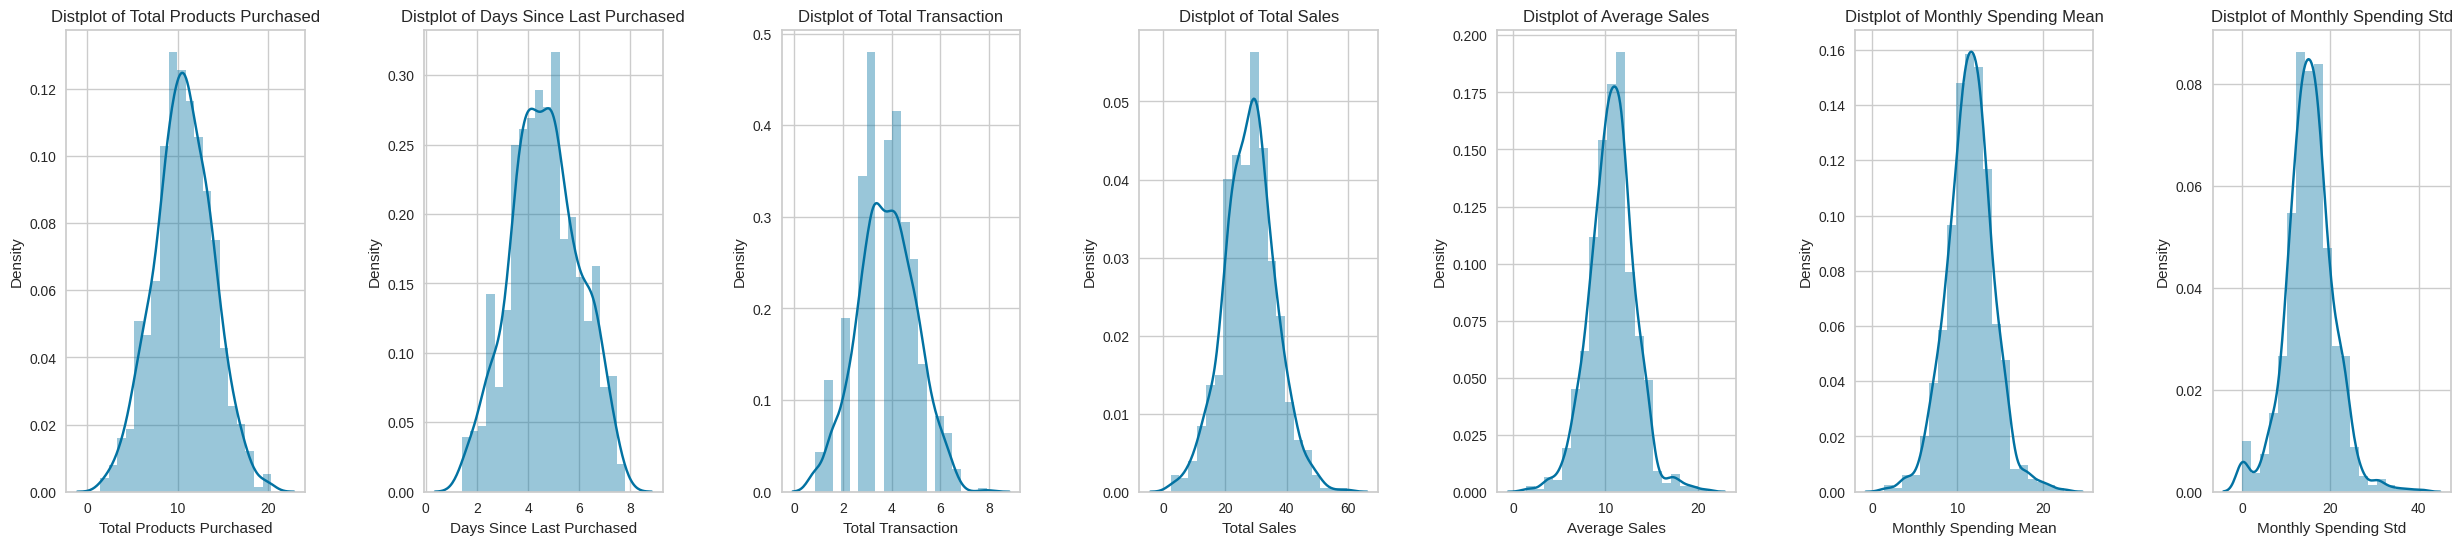

In [ ]:
plt.figure(1 , figsize = (40 , 6))
n = 0
for x in ['Total Products Purchased' , 'Days Since Last Purchased',
       'Total Transaction', 'Total Sales', 'Average Sales',
       'Monthly Spending Mean', 'Monthly Spending Std']:
    n += 1
    plt.subplot(1 , 9 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(merged_data_outlier[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Feature Scaling

In [ ]:
scaler = StandardScaler()

exclude_col = ['Customer ID']
col_to_scale = merged_data_outlier.columns.difference(exclude_col)
merged_data_scaled = merged_data_outlier.copy()
merged_data_scaled[col_to_scale] = scaler.fit_transform(merged_data_scaled[col_to_scale])
merged_data_scaled = pd.DataFrame(merged_data_scaled, columns=merged_data.columns)
merged_data_scaled

,Customer ID,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std
0,AA-10315,-0.648767,0.725323,-0.459931,1.143167,1.560049,1.436619,1.655309
1,AA-10375,-0.139041,-1.031118,1.046277,-0.719449,-1.235006,-1.292611,-0.837601
2,AA-10480,-0.360651,1.015290,-0.893752,-0.220555,0.283397,0.180177,0.199962
3,AA-10645,0.733774,-0.255800,-0.053650,1.018658,1.155671,1.037033,0.548459
4,AB-10015,-1.685085,1.421904,-1.363189,-0.869572,-0.230249,-0.320885,-0.419006
...,...,...,...,...,...,...,...,...
788,XP-21865,1.815913,-0.444747,1.707790,0.078966,-0.591732,-0.315237,-0.489024
789,YC-21895,-0.598811,-1.877249,-0.459931,1.115332,1.529859,1.406738,1.094350
790,YS-21880,0.524500,-1.491231,0.696164,1.416470,1.142342,1.023886,1.137612
791,ZC-21910,1.948735,-0.270044,2.327310,1.687033,0.709316,1.109621,0.596331


## Feature Selection (PCA)

In [ ]:
merged_data_scaled.set_index('Customer ID', inplace=True)

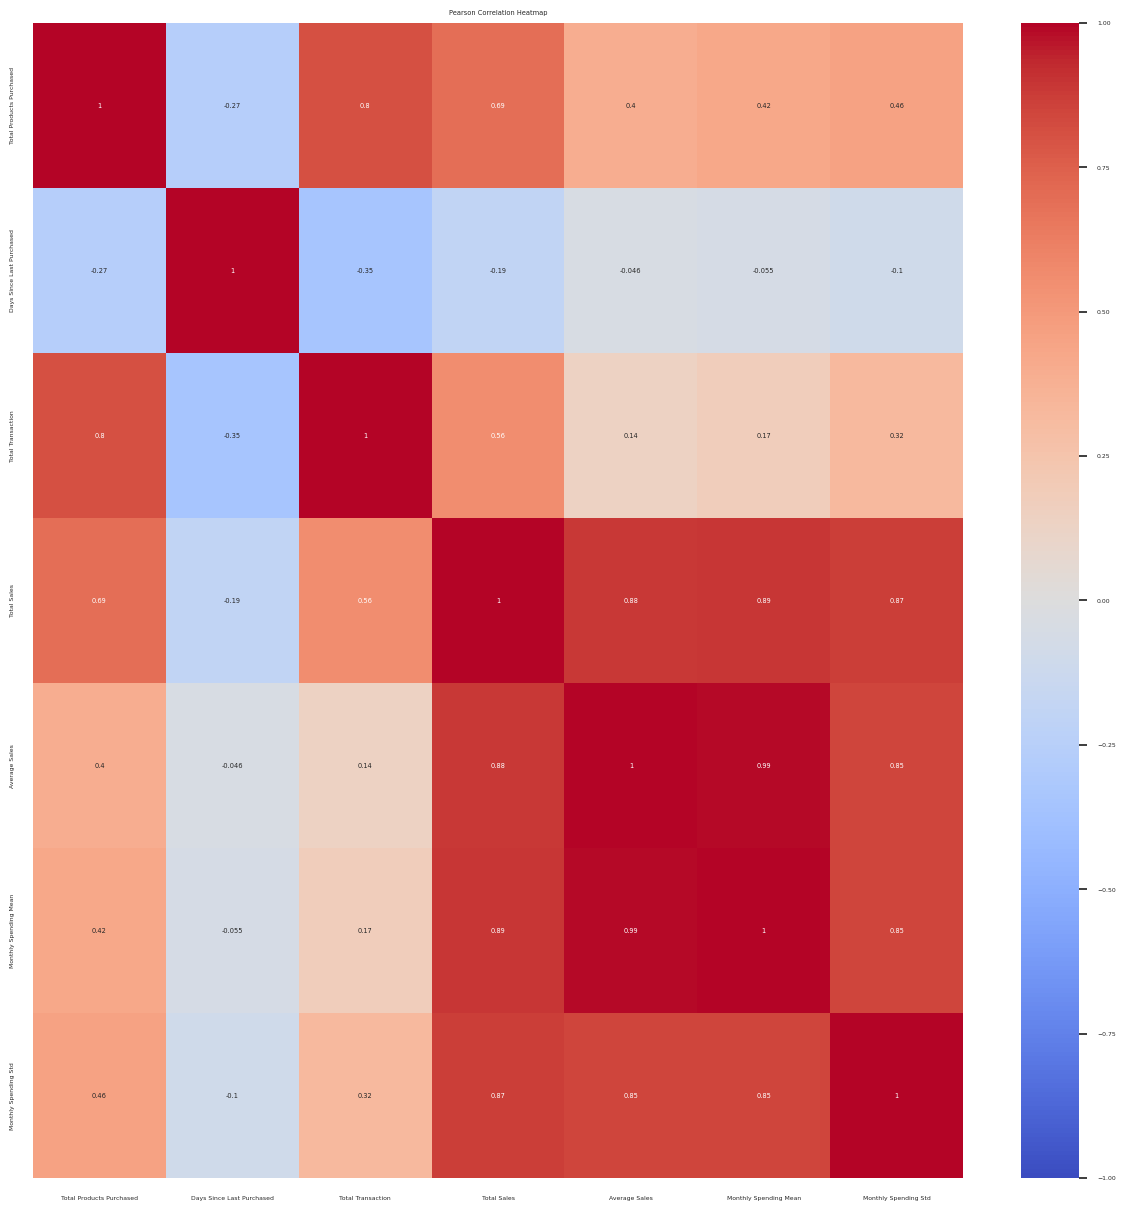

In [ ]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.4)
sns.heatmap(merged_data_scaled.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

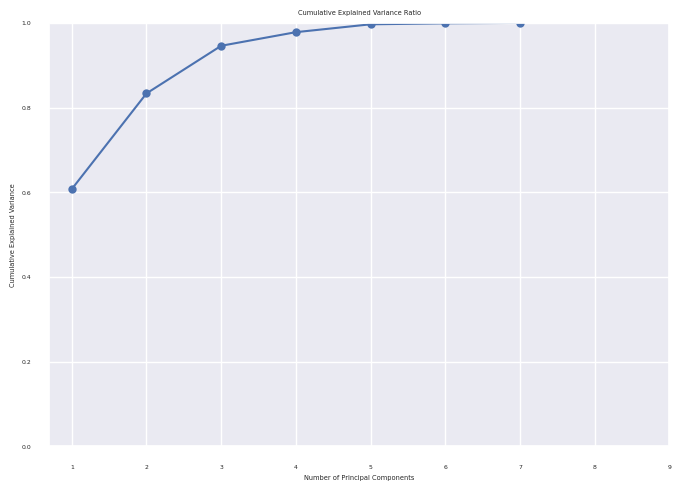

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(merged_data_scaled)

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 10))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=4)
merged_data_pca = pca.fit_transform(merged_data_scaled)
merged_data_pca = pd.DataFrame(merged_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
merged_data_pca

,PC1,PC2,PC3,PC4
0,-2.138576,2.168394,0.089332,-0.618778
1,1.461699,-2.011806,0.335529,-0.445746
2,0.294739,1.347374,-0.424355,0.074840
3,-1.948863,0.405971,0.227888,0.559519
4,1.946650,1.946505,-0.315493,-0.282639
...,...,...,...,...
788,-0.567778,-2.398065,-0.865947,0.463693
789,-2.165444,0.813362,2.319323,-0.107697
790,-2.648584,-0.420994,1.159061,-0.186400
791,-3.185737,-1.662493,-0.963667,0.195191


## K-Means Clustering

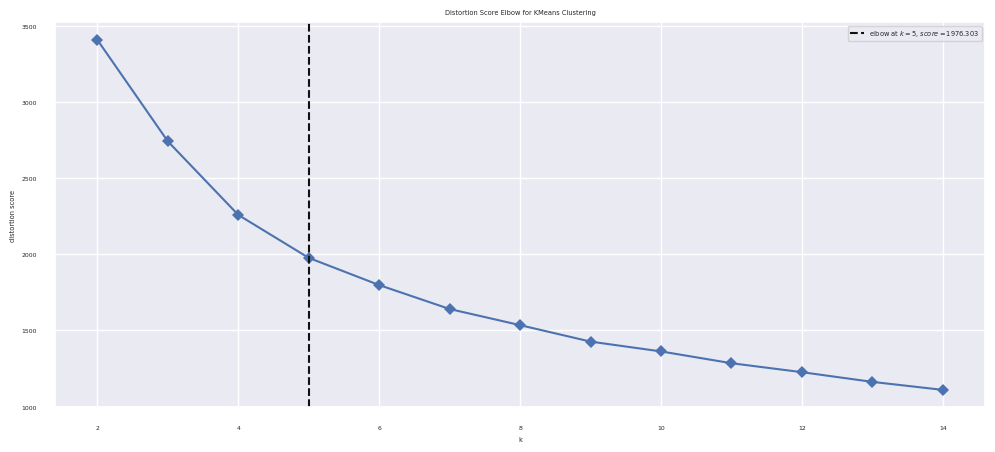

In [ ]:
clusterer = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)
fig, ax = plt.subplots(figsize=(12, 5))
visualizer = KElbowVisualizer(clusterer, k=(2, 15), timings=False, ax=ax)
visualizer.fit(merged_data_pca)
visualizer.show();

For n_clusters = 2 The average silhouette_coefficient is : 0.31172014090661954
For n_clusters = 3 The average silhouette_coefficient is : 0.2542241939474898
For n_clusters = 4 The average silhouette_coefficient is : 0.2588441810517903
For n_clusters = 5 The average silhouette_coefficient is : 0.24317920027348636
For n_clusters = 6 The average silhouette_coefficient is : 0.22957203297560336
For n_clusters = 7 The average silhouette_coefficient is : 0.21898794418570064
For n_clusters = 8 The average silhouette_coefficient is : 0.21728516713699156
For n_clusters = 9 The average silhouette_coefficient is : 0.22682207655218525
For n_clusters = 10 The average silhouette_coefficient is : 0.21415634646957146
For n_clusters = 11 The average silhouette_coefficient is : 0.20965211404906067
For n_clusters = 12 The average silhouette_coefficient is : 0.21116525401960218
For n_clusters = 13 The average silhouette_coefficient is : 0.22446017405443724
For n_clusters = 14 The average silhouette_coeffic

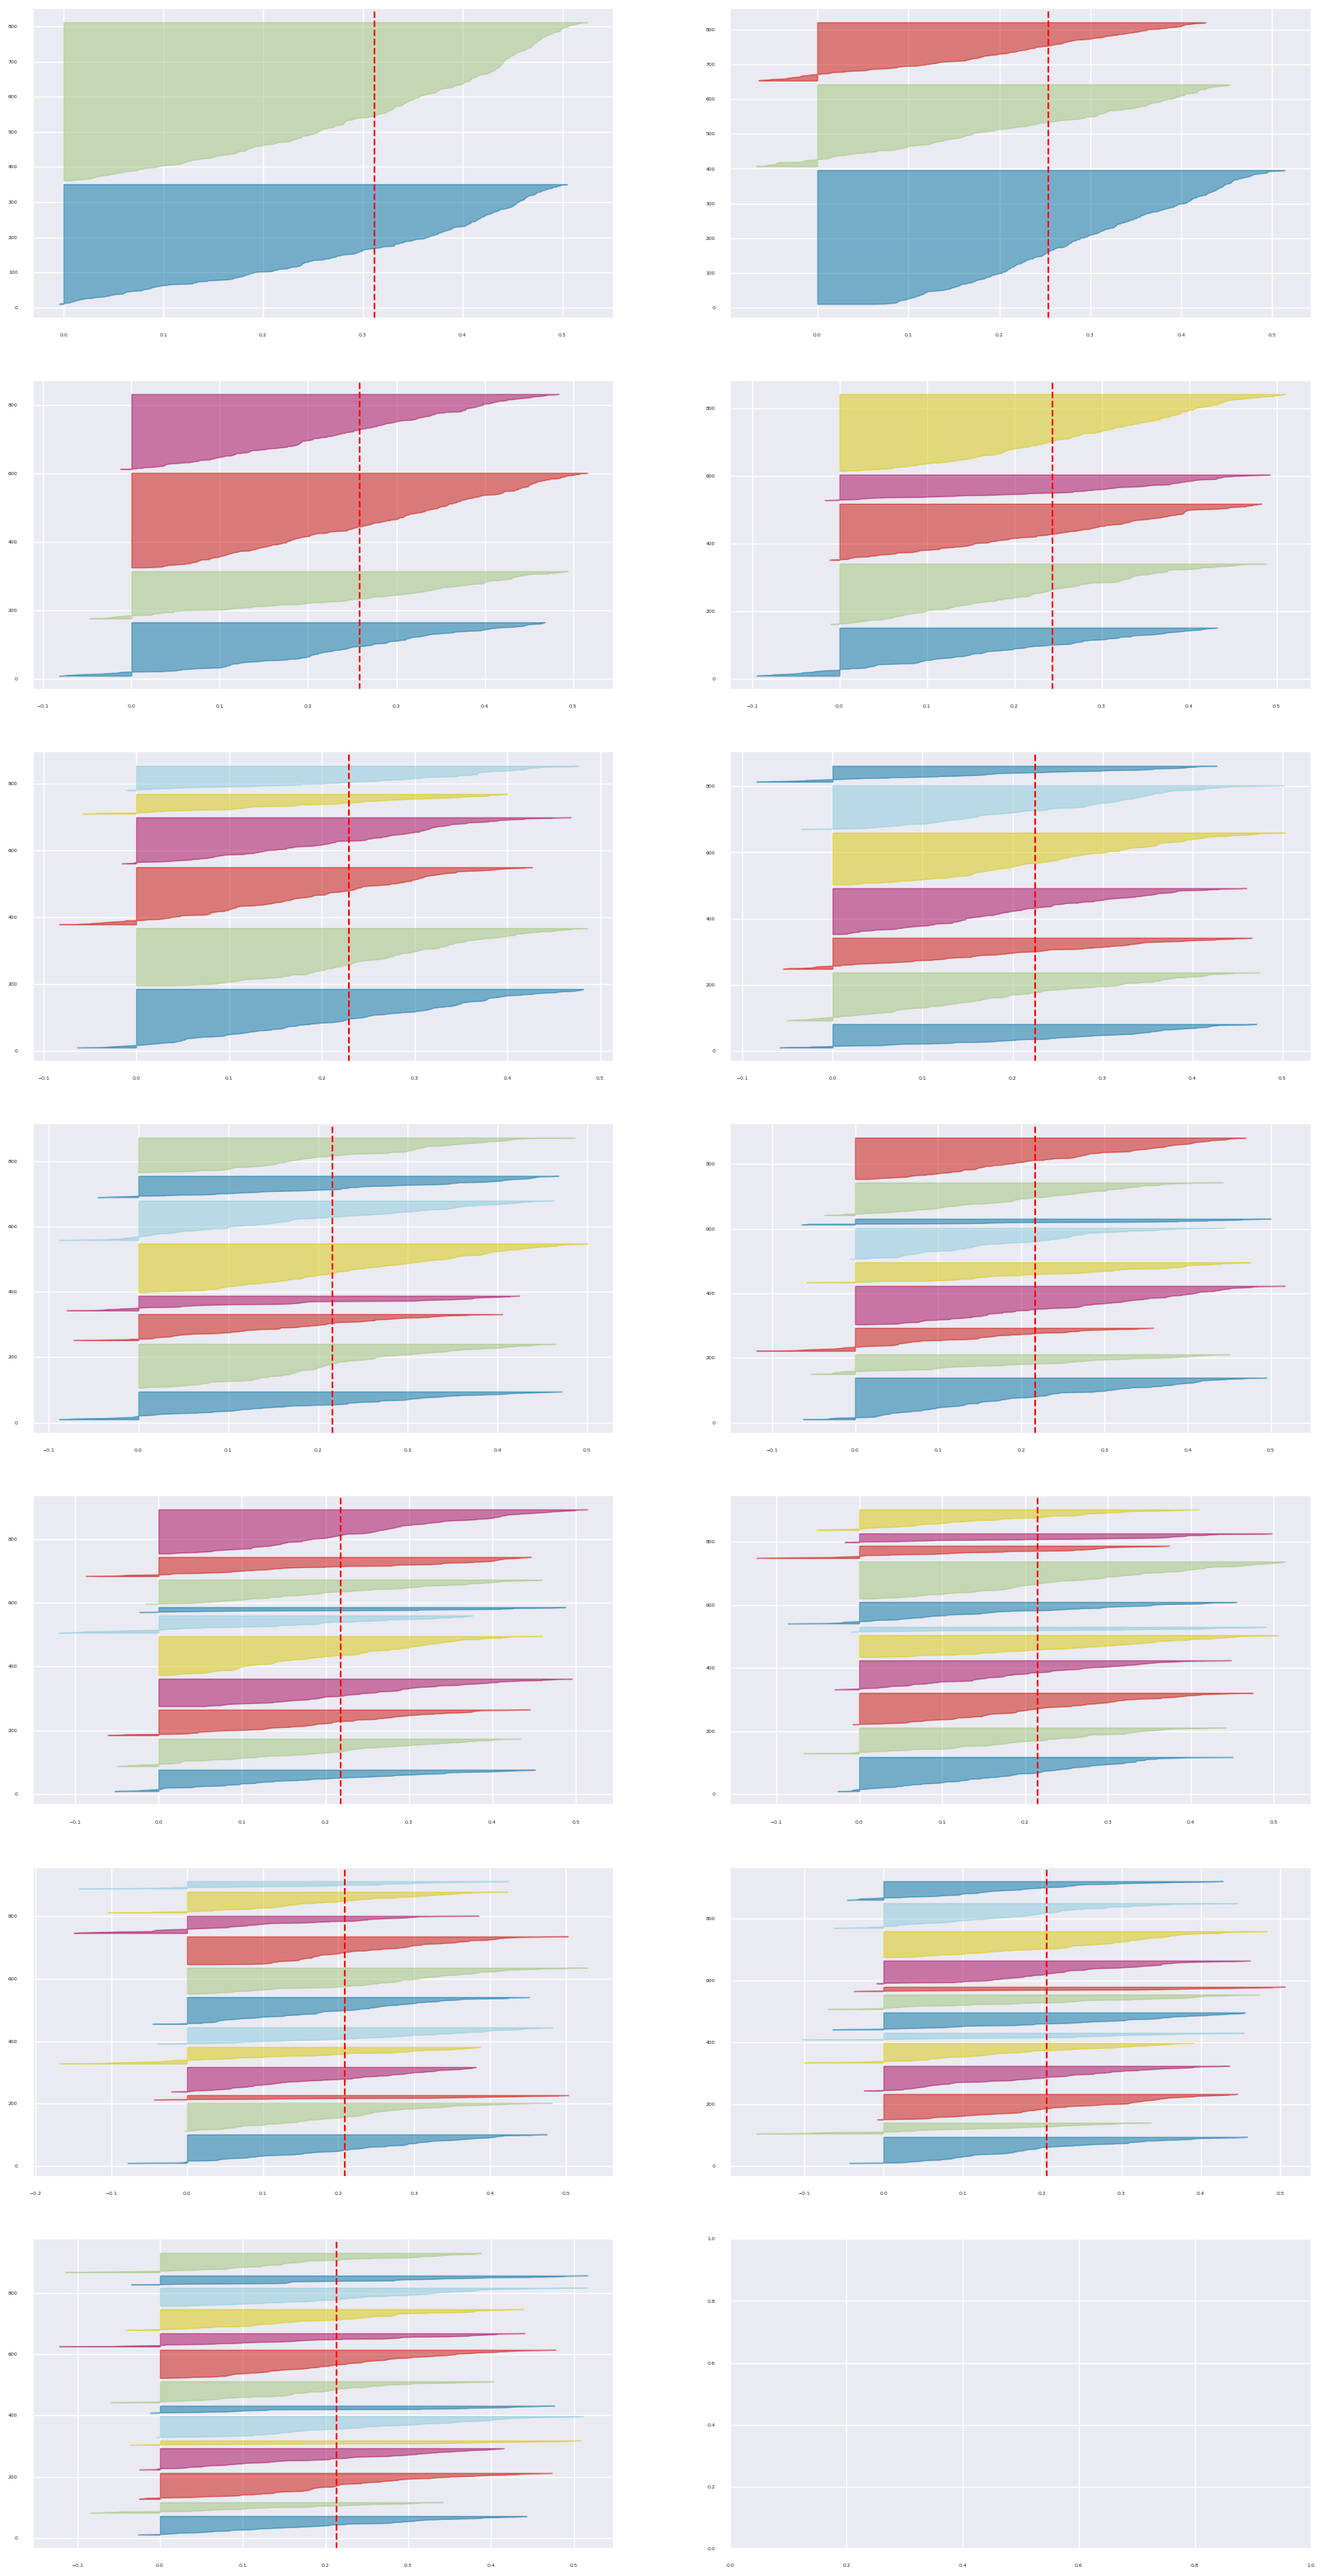

In [ ]:
num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

fig, ax = plt.subplots(7, 2, figsize=(20,40))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(merged_data_pca)

    cluster_labels = clusterer.fit_predict(merged_data_pca)
    silhouette_avg = silhouette_score(merged_data_pca, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(merged_data_pca)
cluster_labels = kmeans.labels_
merged_data['Cluster'] = cluster_labels
merged_data_pca['Cluster'] = cluster_labels

In [ ]:
merged_data.head(10)

,Customer ID,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std,Cluster
0,AA-10315,30,187,5,5563.560,1112.712000,1112.712000,1863.634544,1
1,AA-10375,41,22,9,1056.390,117.376667,117.376667,160.542898,2
2,AA-10480,36,262,4,1790.512,447.628000,447.628000,544.047829,3
3,AA-10645,64,58,6,5086.935,847.822500,847.822500,759.730610,1
4,AB-10015,13,418,3,886.156,295.385333,295.385333,275.932428,3
5,AB-10060,56,57,8,7755.620,969.452500,1107.945714,1792.067942,1
6,AB-10105,73,44,10,14473.571,1447.357100,1447.357100,2984.554332,1
7,AB-10150,37,44,5,966.710,193.342000,193.342000,291.148751,3
8,AB-10165,48,28,8,1113.838,139.229750,139.229750,125.945017,2
9,AB-10255,39,169,9,914.532,101.614667,114.316500,168.639423,0


In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff','#A020F0']

In [ ]:
cluster_0 = merged_data_pca[merged_data_pca['Cluster'] == 0]
cluster_1 = merged_data_pca[merged_data_pca['Cluster'] == 1]
cluster_2 = merged_data_pca[merged_data_pca['Cluster'] == 2]
cluster_3 = merged_data_pca[merged_data_pca['Cluster'] == 3]

fig = go.Figure()

# Add data points for each cluster separately and specify the color based on the fourth dimension
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['PC1'], y=cluster_3['PC2'], z=cluster_3['PC3'],
                           mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='Cluster 3'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

# Reference: https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system/notebook#Step-10.1-|--3D-Visualization-of-Top-Principal-Components

<ipython-input-43-532b6292bb63>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




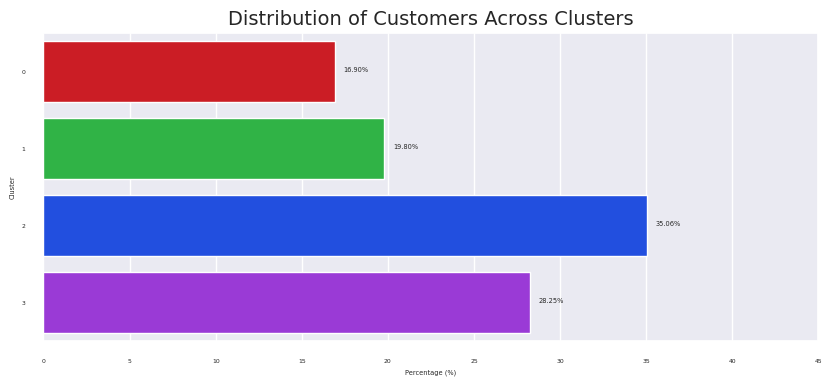

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (merged_data_pca['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

# Reference: https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system/notebook#Step-10.1-|--3D-Visualization-of-Top-Principal-Components

## DBSCAN

In [ ]:
# add unique categories & cust segmentation column
dataframes = [unique_total_category, cust_segment, merged_data]

merged_data_added = reduce(lambda left, right: pd.merge(left, right, on='Customer ID', how='outer'), dataframes)
merged_data_added

,Customer ID,Unique Total Category Purchased,Segment,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std
0,AA-10315,3,0,30,187,5,5563.560,1112.712000,1112.712000,1863.634544
1,AA-10375,3,0,41,22,9,1056.390,117.376667,117.376667,160.542898
2,AA-10480,3,0,36,262,4,1790.512,447.628000,447.628000,544.047829
3,AA-10645,3,0,64,58,6,5086.935,847.822500,847.822500,759.730610
4,AB-10015,3,0,13,418,3,886.156,295.385333,295.385333,275.932428
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,3,0,100,46,11,2374.658,215.878000,296.832250,253.385888
789,YC-21895,3,1,31,7,5,5454.350,1090.870000,1090.870000,1214.932890
790,YS-21880,3,1,58,12,8,6720.444,840.055500,840.055500,1257.954059
791,ZC-21910,3,0,105,57,13,8025.707,617.362077,891.745222,793.602738


In [ ]:
normalize = MinMaxScaler()

exclude_col = ['Customer ID', 'Segment']
col_to_scale = merged_data_added.columns.difference(exclude_col)
merged_data_norm = merged_data_added.copy()
merged_data_norm[col_to_scale] = normalize.fit_transform(merged_data_norm[col_to_scale])
merged_data_norm = pd.DataFrame(merged_data_norm, columns=merged_data_added.columns)

In [ ]:
merged_data_norm.set_index('Customer ID', inplace=True)
merged_data_norm

,Unique Total Category Purchased,Segment,Total Products Purchased,Days Since Last Purchased,Total Transaction,Total Sales,Average Sales,Monthly Spending Mean,Monthly Spending Std
Customer ID,,,,,,,,,
AA-10315,1.0,0,0.189189,0.157940,0.2500,0.222010,0.221784,0.221784,0.178626
AA-10375,1.0,0,0.263514,0.016309,0.5000,0.041998,0.022964,0.022964,0.015388
AA-10480,1.0,0,0.229730,0.222318,0.1875,0.071318,0.088932,0.088932,0.052146
AA-10645,1.0,0,0.418919,0.047210,0.3125,0.202974,0.168872,0.168872,0.072819
AB-10015,1.0,0,0.074324,0.356223,0.1250,0.035199,0.058521,0.058521,0.026448
...,...,...,...,...,...,...,...,...,...
XP-21865,1.0,0,0.662162,0.036910,0.6250,0.094648,0.042639,0.058810,0.024287
YC-21895,1.0,1,0.195946,0.003433,0.2500,0.217648,0.217421,0.217421,0.116449
YS-21880,1.0,1,0.378378,0.007725,0.4375,0.268214,0.167321,0.167321,0.120573


In [ ]:
DBS_clustering = DBSCAN(eps=1, min_samples=10).fit(merged_data_norm)

DBSCAN_clustered = merged_data_norm.copy()
labels = DBS_clustering.labels_
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
0,409
1,148
2,236
